# **Trabalhando com Planilhas em Excel **

In [ ]:
#importando a blibioteca pelo Upload
import pandas as pd


In [ ]:
#leitura de arquivos 
from pandas.io.excel import read_excel
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [ ]:
#exibindo as 5 primeiras linhas do dataframe
df2.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Fortaleza,2019-01-01,45.27,1002,2
1,Fortaleza,2019-01-01,115.61,1002,3
2,Fortaleza,2019-02-10,35.33,1004,3
3,Fortaleza,2019-02-10,20.95,1004,6
4,Fortaleza,2019-01-01,14.25,1004,6


In [ ]:
#concatenando arquivos 
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
#exibindo as 5 primeiras linhas do dataframe
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
#exibindo as 5 ultimas linhas do dataframe 
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
#Verificar a media de vendas 
df["Vendas"].mean()

122.61180089485458

In [ ]:
#verificando amostra das cinco linhas gerais do dataframe
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
41,Salvador,2019-02-13,9.86,1035,2
35,Fortaleza,2019-01-01,133.97,1005,2
49,Fortaleza,2019-01-01,183.33,1002,6
16,Natal,2018-07-01,298.00,854,3
83,Recife,2019-01-01,143.61,983,6


In [ ]:
#verificando o tipo de dado de cada coluna 
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#alterando o tipo de dados da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

# Tratando valores Nullos

In [ ]:
#consultando linhas com valores null 
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#substituindo os valores nulos por zero 
df["Vendas"].fillna(0, inplace=True)

In [ ]:
#usbstituindo os valores nulos pela media 
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#apagando as linhas com valores null
df.dropna(inplace=True)

In [ ]:
#apagando as linhas com valores nullos em apenas 1 coluna 
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
#removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

In [ ]:
#Criando colunas novas 
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [ ]:
#Retornando a maior receita 
df["Receita"].max()

3544.0

In [ ]:
#retornando a menor receita 
df["Receita"].min()

3.34

In [ ]:
#nlargest _ Pode escolher o top com maior receita 
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [ ]:
#nsmallest _ Tras as 3 piores receitas 
df.nsmallest(3, "Receita")



,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [ ]:
#agrupamento por cidade 
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#ordenando o conjunto de dados 
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


# **Trabalhando com datas**

In [ ]:
#Transformando a colunas de data em tipo inteiro 
df["Data"] = df["Data"].astype("int64")

In [ ]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [ ]:
#Transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [ ]:
#Agrupamento por ano 
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#criando uma nova coluna com o ano 
df["ano_venda"] = df["Data"].dt.year
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,mes_venda,dia_vendas,ano_venda
141,Natal,2019-01-02,9.08,1036,1,9.08,1.0,1,2,2019
133,Recife,2019-03-02,14.67,980,7,102.69,7.0,3,2,2019
136,Natal,2019-01-02,13.81,1036,1,13.81,1.0,1,2,2019
90,Recife,2019-01-01,16.04,980,1,16.04,1.0,1,1,2019
6,Salvador,2019-01-01,36.30,1034,2,72.60,2.0,1,1,2019


In [ ]:
#Extraiundo o mes e dia da venda
df["mes_venda"], df ["dia_vendas"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,mes_venda,dia_vendas,ano_venda
49,Salvador,2019-01-01,37.88,1034,2,75.76,2.0,1,1,2019
74,Recife,2019-01-01,38.79,983,6,232.74,6.0,1,1,2019
225,Natal,2019-01-02,36.23,1035,1,36.23,1.0,1,2,2019
84,Natal,2019-01-02,22.99,1036,1,22.99,1.0,1,2,2019
106,Aracaju,2018-01-01,16.32,1520,7,114.24,7.0,1,1,2018


In [ ]:
#Retornando a data mais antiga 
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#Calculando a diferenca de dias 
df["diferenca_dias"] = df["Data"].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,mes_venda,dia_vendas,ano_venda,diferenca_dias
55,Natal,2019-01-08,859.00,854,4,3436.00,4.0,1,8,2019,2018-01-01
48,Salvador,2019-01-01,127.28,1035,2,254.56,2.0,1,1,2019,2018-01-01
43,Salvador,2019-01-01,12.21,1034,1,12.21,1.0,1,1,2019,2018-01-01
98,Recife,2019-01-01,137.34,981,8,1098.72,8.0,1,1,2019,2018-01-01
77,Recife,2019-01-01,102.82,981,6,616.92,6.0,1,1,2019,2018-01-01


In [ ]:
#Criando a coluna de trimestre 
df["trimestre_venda"] = df["Data"].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,mes_venda,dia_vendas,ano_venda,diferenca_dias,trimestre_venda
63,Natal,2018-02-12,552.00,852,2,1104.00,2.0,2,12,2018,2018-01-01,1
74,Natal,2019-03-10,303.00,854,3,909.00,3.0,3,10,2019,2018-01-01,1
117,Aracaju,2018-01-01,170.97,1521,4,683.88,4.0,1,1,2018,2018-01-01,1
132,Recife,2019-03-02,17.49,983,5,87.45,5.0,3,2,2019,2018-01-01,1
124,Natal,2019-01-02,44.82,1034,3,134.46,3.0,1,2,2019,2018-01-01,1


In [ ]:
#Filtrando as vendas de 2019 do mes de março 
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,mes_venda,dia_vendas,ano_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,3,2,2019,2018-01-01,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,3,2,2019,2018-01-01,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,3,2,2019,2018-01-01,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,3,2,2019,2018-01-01,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,3,2,2019,2018-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,3,2,2019,2018-01-01,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,3,2,2019,2018-01-01,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,3,2,2019,2018-01-01,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,3,2,2019,2018-01-01,1


# Visualização de Dados

In [ ]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

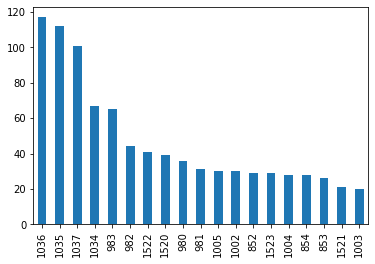

In [ ]:
#Grafico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

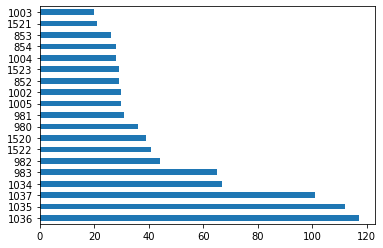

In [ ]:
#Graficos de barras horizontais 
df["LojaID"].value_counts().plot.barh()

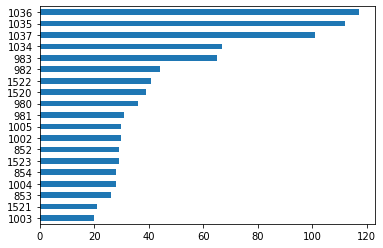

In [ ]:
#Graficos de barras horizontais ( do maior para o menor , ponto e virgula para não mostar a informação acima do grafico )
df["LojaID"].value_counts(ascending=True).plot.barh();

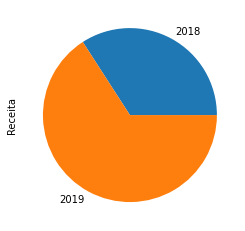

In [ ]:
#Grafico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [ ]:
#total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

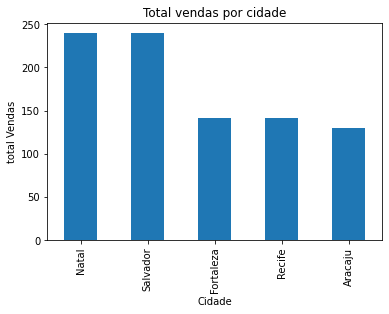

In [ ]:
#Adicionando um titulo e alterando o nome dos eixos 
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("total Vendas");

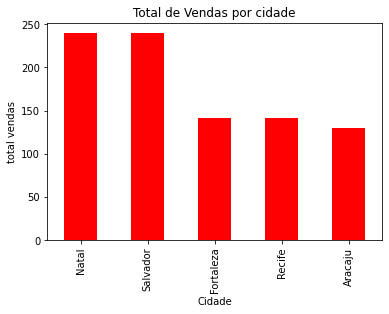

In [ ]:
#Alterando a cor do eixo
df["Cidade"].value_counts().plot.bar(title="Total de Vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("total vendas");

In [ ]:
#alterando o estilo
plt.style.use("ggplot")

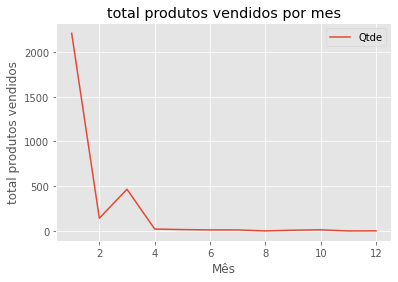

In [ ]:

df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "total produtos vendidos por mes")
plt.xlabel("Mês")
plt.ylabel("total produtos vendidos")
plt.legend();

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["ano_venda"] == 2019]

In [ ]:
#total vendas apenas 2019
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

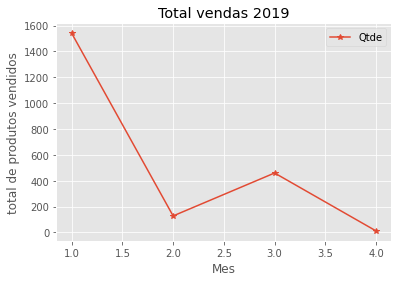

In [ ]:
#Total produtos vendidos por mes 
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(title = "Total vendas 2019", marker = "*")
plt.xlabel("Mes")
plt.ylabel("total de produtos vendidos")
plt.legend();

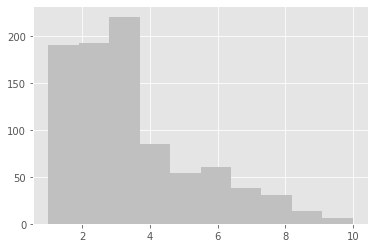

In [ ]:
#Grafico de Histograma
plt.hist(df["Qtde"], color="silver");

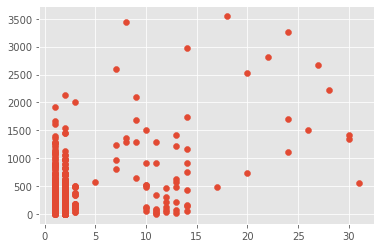

In [ ]:
plt.scatter(x=df_2019["dia_vendas"], y = df_2019["Receita"]);

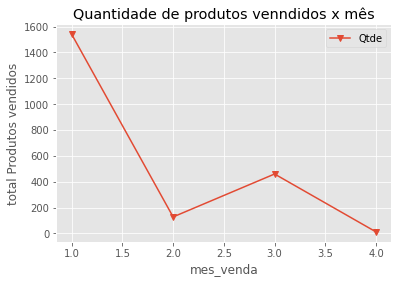

In [ ]:
#Salvando em .png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos venndidos x mês")
plt.ylabel("Mês")
plt.ylabel("total Produtos vendidos")
plt.legend()
plt.savefig("Grafico QTDE x Mes.png");

# Analise Exploratoria

In [101]:
#importando as blibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [104]:
#Upload do arquivo ( Via codigo)
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [105]:
#Criando nosso dataframe
df = pd.read_excel("AdventureWorks.xlsx")


In [106]:
#Visualizando nosso Dataframe
df.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [107]:
#quantidade de linhas e colunas 
df.shape

(904, 16)

In [108]:
#Verificadndo os tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [120]:
#Qual a Receita total? apresentando a casa decimal apenas com dois digitos com round
round(df["Valor Venda"].sum(), 2)

5984606.14

In [111]:
#Qual o custo total?
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"]) #criando a coluna de custo

In [114]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [116]:
#Qual o custo total?
round(df["custo"].sum(), 2)

2486783.05

In [117]:
#Agora que temos a receita e custo e o total, podemos achar o lucro total 
#Vamos criar uma coluna de lucro que será Receito = Custo 
df["lucro"] = df["Valor Venda"] - df["custo"]

In [118]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [119]:
#Total lucro 
round(df["lucro"].sum(), 2)

3497823.09

In [121]:
#criando uma coluna com total de dias para enviar produto 
df["tempo_envio"] = df["Data Envio"] - df["Data Venda"]

In [122]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


Saber o tempo de envio de cada Marca, e para isso precisamos transformar a coluna Tempo_envio em numerica.

In [123]:
#Extraindo apenas os dias 
df["tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days  

In [124]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [125]:
#Verificando o tipo da coluna Tempo_Envio 
df["tempo_envio"].dtypes

dtype('int64')

In [126]:
#media do tempo de envio por marca
df.groupby("Marca")["tempo_envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: tempo_envio, dtype: float64

Missing Values

In [127]:
#verificando se temos dados faltantes 
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
tempo_envio       0
dtype: int64

E, se a gente quiser saber o lucro por Ano e Por Marca

In [134]:
#vamos agrupar por ano e marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: lucro, dtype: float64

In [129]:
#configuração dos formatos Flutuantes 
pd.options.display.float_format = "{:20,.2f}".format

In [133]:
#Resetando o Index 
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [132]:
#Qual o total de produtos vendidos?
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

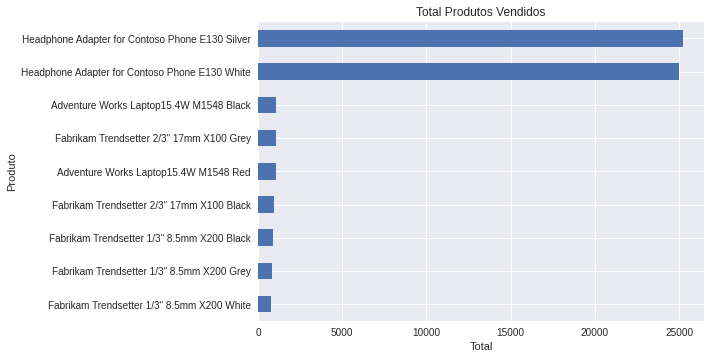

In [136]:
#Grafico total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

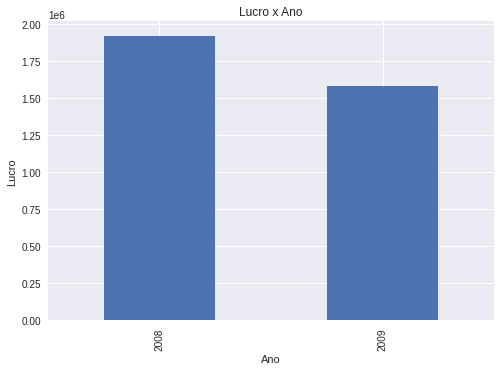

In [137]:
#lucro por ano 
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Lucro");

In [138]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: lucro, dtype: float64

In [139]:
#Selecionando apenas as vendas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [140]:
df_2009.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12


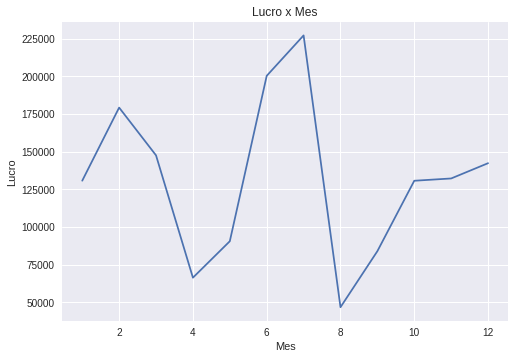

In [143]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro x Mes")
plt.xlabel("Mes")
plt.ylabel("Lucro");

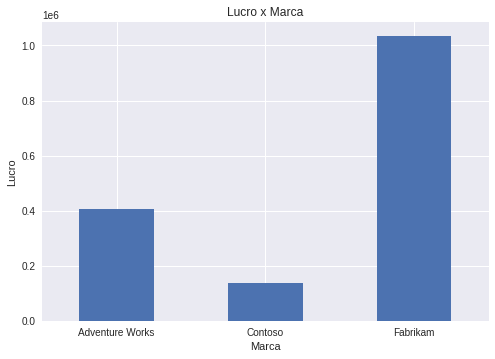

In [146]:
df_2009.groupby("Marca")["lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");

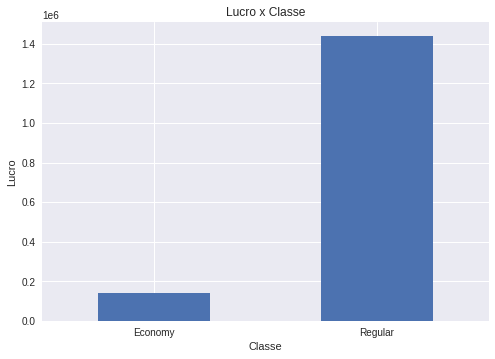

In [147]:
df_2009.groupby("Classe")["lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");

In [148]:
#analise estatistica ( Padrão )
df["tempo_envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: tempo_envio, dtype: float64

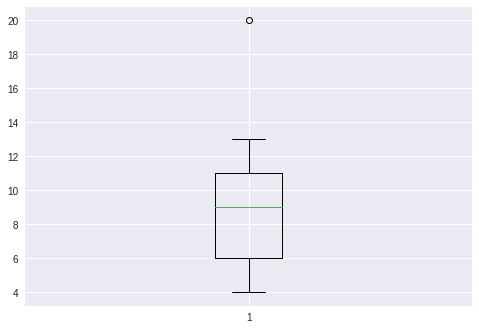

In [149]:
#Grafico de Boxplot
plt.boxplot(df["tempo_envio"]);

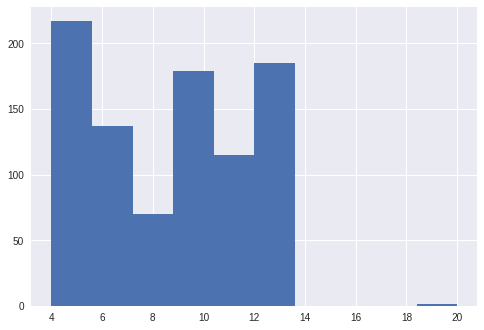

In [150]:
#Histograma
plt.hist(df["tempo_envio"]);

In [151]:
#tempo minimo de envio 
df["tempo_envio"].min()

4

In [152]:
#tempo maximo de envio 
df["tempo_envio"].max()

20

In [153]:
#identificando o outlier boxplot
df[df["tempo_envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [154]:
df.to_csv("df_novo.csv", index=False)